In [1]:
import boto3

s3 = boto3.client('s3')
bucket_name = 'fakenewsdetectordata'

# List files in the bucket
response = s3.list_objects_v2(Bucket=bucket_name)
if 'Contents' in response:
    for obj in response['Contents']:
        print(obj['Key'])
else:
    print("Bucket is empty or inaccessible")


combined_subset.csv


In [2]:
import pandas as pd

s3_path = 's3://fakenewsdetectordata/combined_subset.csv'
df = pd.read_csv(s3_path)

# Check the first few rows
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [3]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [4]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [5]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42
)


In [6]:
print("Number of training samples:", len(train_texts))
print("Number of test samples:", len(test_texts))
print("First training sample text:\n", train_texts.iloc[0])
print("First training label:", train_labels.iloc[0])


Number of training samples: 800
Number of test samples: 200
First training sample text:
 when sen al franken dmn announced his plans to resign thursday he specifically called out donald trump over the access hollywood video and roy moore an alleged pedophile who is running for the senate seat in alabama with the gop s blessing donald trump jr not known for being a brainiac decided to mock franken on twitter as if he didn t listen to the democrat s amazing speech junior invoked one of the former comedian s  saturday night live  most wellknown characters writing  because i m good enough i m smart enough and goddarnit people like me  and included the hashtag  franken because i m good enough i m smart enough and goddarnit people like me franken  donald trump jr donaldjtrumpjr december  twitter gave junior a wakeup callpictwittercomnmurmmgmz  liberalgranny peppersandeggs december  i am sure daddy realdonaldtrump can sympathize as he is a fellow sexual predator  pictwittercomqesftpu  matt sl

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

clf = LogisticRegression()
clf.fit(X_train, train_labels)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(test_labels, y_pred))
print(classification_report(test_labels, y_pred))


Accuracy: 0.995
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.99      1.00      0.99        96

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [9]:
user_text = "The government has secretly approved a new plan to cancel taxes for everyone."  # type one live
predict_text(user_text)



NameError: name 'predict_text' is not defined

In [10]:
def predict_text(text):
    X = vectorizer.transform([text])
    pred = clf.predict(X)[0]
    prob = clf.predict_proba(X)[0]
    print("Text:", text[:200] + ("..." if len(text) > 200 else ""))
    print("Predicted label:", pred)
    print("Confidence:", {0: round(prob[0],3), 1: round(prob[1],3)})
    return pred, prob


In [11]:
user_text = "The government has secretly approved a new plan to cancel taxes for everyone."
predict_text(user_text)


Text: The government has secretly approved a new plan to cancel taxes for everyone.
Predicted label: 0
Confidence: {0: 0.703, 1: 0.297}


(0, array([0.70333624, 0.29666376]))

In [12]:

predict_text("The President signed a new healthcare bill into law on Tuesday.")
predict_text("NASA successfully launched a satellite to monitor climate change.")
predict_text("The Federal Reserve announced an increase in interest rates this week.")


Text: The President signed a new healthcare bill into law on Tuesday.
Predicted label: 0
Confidence: {0: 0.804, 1: 0.196}
Text: NASA successfully launched a satellite to monitor climate change.
Predicted label: 0
Confidence: {0: 0.536, 1: 0.464}
Text: The Federal Reserve announced an increase in interest rates this week.
Predicted label: 0
Confidence: {0: 0.702, 1: 0.298}


(0, array([0.70249839, 0.29750161]))

In [13]:
predict_text("Aliens have landed in New York City and replaced the mayor with a clone.")
predict_text("Scientists confirm chocolate cures all diseases and extends life by 50 years.")
predict_text("The government secretly controls the weather using giant hidden machines.")


Text: Aliens have landed in New York City and replaced the mayor with a clone.
Predicted label: 0
Confidence: {0: 0.588, 1: 0.412}
Text: Scientists confirm chocolate cures all diseases and extends life by 50 years.
Predicted label: 1
Confidence: {0: 0.476, 1: 0.524}
Text: The government secretly controls the weather using giant hidden machines.
Predicted label: 0
Confidence: {0: 0.597, 1: 0.403}


(0, array([0.59748008, 0.40251992]))

In [14]:
predict_text("A new study claims drinking four cups of coffee a day prevents memory loss.")
predict_text("Tech companies are investing billions into AI to create human-like robots.")


Text: A new study claims drinking four cups of coffee a day prevents memory loss.
Predicted label: 0
Confidence: {0: 0.531, 1: 0.469}
Text: Tech companies are investing billions into AI to create human-like robots.
Predicted label: 0
Confidence: {0: 0.53, 1: 0.47}


(0, array([0.53006203, 0.46993797]))

In [15]:
import pandas as pd

# Example sentences for demo
test_sentences = [
    # Real-sounding
    "The President signed a new healthcare bill into law on Tuesday.",
    "NASA successfully launched a satellite to monitor climate change.",
    "The Federal Reserve announced an increase in interest rates this week.",

    # Fake-sounding
    "Aliens have landed in New York City and replaced the mayor with a clone.",
    "Scientists confirm chocolate cures all diseases and extends life by 50 years.",
    "The government secretly controls the weather using giant hidden machines.",

    # Ambiguous
    "A new study claims drinking four cups of coffee a day prevents memory loss.",
    "Tech companies are investing billions into AI to create human-like robots."
]

# Collect results
results = []
for text in test_sentences:
    X = vectorizer.transform([text])
    pred = clf.predict(X)[0]
    prob = clf.predict_proba(X)[0]
    results.append({
        "Text": text[:70] + ("..." if len(text) > 70 else ""),  # short preview
        "Predicted Label": pred,
        "Confidence Real (0)": round(prob[0], 3),
        "Confidence Fake (1)": round(prob[1], 3)
    })

# Convert to table
df_results = pd.DataFrame(results)

# Show results
print(df_results.to_string(index=False))


                                                                     Text  Predicted Label  Confidence Real (0)  Confidence Fake (1)
          The President signed a new healthcare bill into law on Tuesday.                0                0.804                0.196
        NASA successfully launched a satellite to monitor climate change.                0                0.536                0.464
   The Federal Reserve announced an increase in interest rates this week.                0                0.702                0.298
Aliens have landed in New York City and replaced the mayor with a clon...                0                0.588                0.412
Scientists confirm chocolate cures all diseases and extends life by 50...                1                0.476                0.524
The government secretly controls the weather using giant hidden machin...                0                0.597                0.403
A new study claims drinking four cups of coffee a day prevents memory

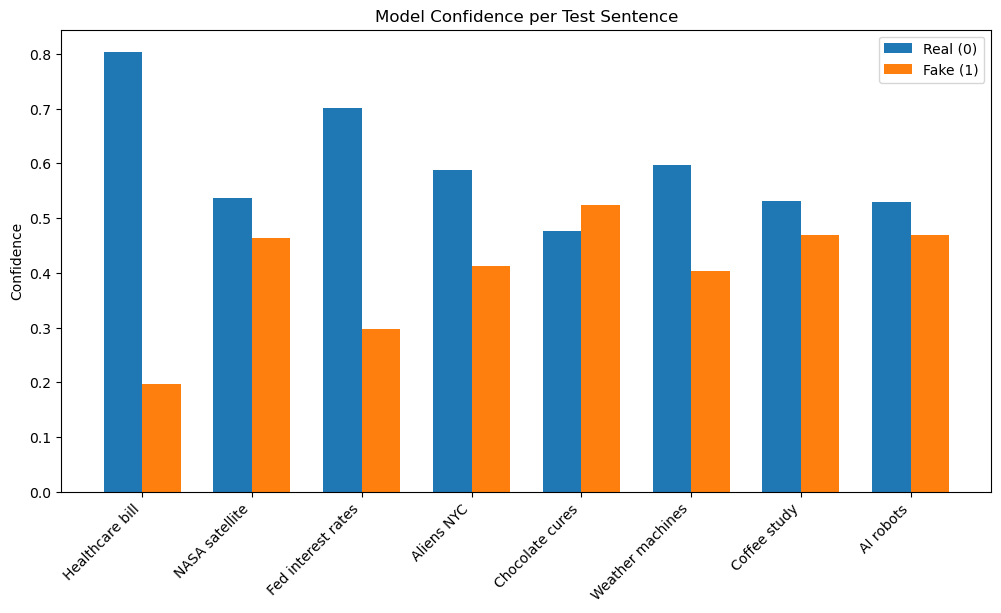

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Short labels for display
labels = [
    "Healthcare bill",
    "NASA satellite",
    "Fed interest rates",
    "Aliens NYC",
    "Chocolate cures",
    "Weather machines",
    "Coffee study",
    "AI robots"
]

real_probs = df_results["Confidence Real (0)"].values
fake_probs = df_results["Confidence Fake (1)"].values

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, real_probs, width, label='Real (0)')
rects2 = ax.bar(x + width/2, fake_probs, width, label='Fake (1)')

ax.set_ylabel('Confidence')
ax.set_title('Model Confidence per Test Sentence')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

plt.show()


In [17]:
import pandas as pd

# Example test sentences
test_sentences = [
    "The President signed a new healthcare bill into law on Tuesday.",
    "NASA successfully launched a satellite to monitor climate change.",
    "The Federal Reserve announced an increase in interest rates this week.",
    "Aliens have landed in New York City and replaced the mayor with a clone.",
    "Scientists confirm chocolate cures all diseases and extends life by 50 years.",
    "The government secretly controls the weather using giant hidden machines.",
    "A new study claims drinking four cups of coffee a day prevents memory loss.",
    "Tech companies are investing billions into AI to create human-like robots."
]

# Predict on each sentence
results = []
for text in test_sentences:
    pred_label, probs = predict_text(text)
    results.append({
        "Text": text,
        "Predicted Label": pred_label,
        "Confidence Real (0)": round(probs[0], 3),
        "Confidence Fake (1)": round(probs[1], 3)
    })

# Create DataFrame
results_df = pd.DataFrame(results)

print(results_df.to_string(index=False))


Text: The President signed a new healthcare bill into law on Tuesday.
Predicted label: 0
Confidence: {0: 0.804, 1: 0.196}
Text: NASA successfully launched a satellite to monitor climate change.
Predicted label: 0
Confidence: {0: 0.536, 1: 0.464}
Text: The Federal Reserve announced an increase in interest rates this week.
Predicted label: 0
Confidence: {0: 0.702, 1: 0.298}
Text: Aliens have landed in New York City and replaced the mayor with a clone.
Predicted label: 0
Confidence: {0: 0.588, 1: 0.412}
Text: Scientists confirm chocolate cures all diseases and extends life by 50 years.
Predicted label: 1
Confidence: {0: 0.476, 1: 0.524}
Text: The government secretly controls the weather using giant hidden machines.
Predicted label: 0
Confidence: {0: 0.597, 1: 0.403}
Text: A new study claims drinking four cups of coffee a day prevents memory loss.
Predicted label: 0
Confidence: {0: 0.531, 1: 0.469}
Text: Tech companies are investing billions into AI to create human-like robots.
Predicted l

In [18]:
import pandas as pd

# Example test sentences
test_sentences = [
    "The President signed a new healthcare bill into law on Tuesday.",
    "NASA successfully launched a satellite to monitor climate change.",
    "The Federal Reserve announced an increase in interest rates this week.",
    "Aliens have landed in New York City and replaced the mayor with a clone.",
    "Scientists confirm chocolate cures all diseases and extends life by 50 years.",
    "The government secretly controls the weather using giant hidden machines.",
    "A new study claims drinking four cups of coffee a day prevents memory loss.",
    "Tech companies are investing billions into AI to create human-like robots."
]

# Optional reasoning / notes for each sentence
notes = [
    "Official government event, likely real news.",
    "Scientific event reported by NASA, likely real news.",
    "Official financial news, likely real.",
    "Outrageous claim, clearly fake but model slightly unsure.",
    "Exaggerated health claim, fake news.",
    "Conspiracy-style claim, fake news but model confused.",
    "Health study, plausible but ambiguous.",
    "Tech news, plausible but could be exaggerated."
]

# Predict on each sentence
results = []
for text, note in zip(test_sentences, notes):
    pred_label, probs = predict_text(text)
    results.append({
        "Text": text,
        "Predicted Label": pred_label,
        "Confidence Real (0)": round(probs[0], 3),
        "Confidence Fake (1)": round(probs[1], 3),
        "Reasoning / Notes": note
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# Show full table
print(results_df.to_string(index=False))


Text: The President signed a new healthcare bill into law on Tuesday.
Predicted label: 0
Confidence: {0: 0.804, 1: 0.196}
Text: NASA successfully launched a satellite to monitor climate change.
Predicted label: 0
Confidence: {0: 0.536, 1: 0.464}
Text: The Federal Reserve announced an increase in interest rates this week.
Predicted label: 0
Confidence: {0: 0.702, 1: 0.298}
Text: Aliens have landed in New York City and replaced the mayor with a clone.
Predicted label: 0
Confidence: {0: 0.588, 1: 0.412}
Text: Scientists confirm chocolate cures all diseases and extends life by 50 years.
Predicted label: 1
Confidence: {0: 0.476, 1: 0.524}
Text: The government secretly controls the weather using giant hidden machines.
Predicted label: 0
Confidence: {0: 0.597, 1: 0.403}
Text: A new study claims drinking four cups of coffee a day prevents memory loss.
Predicted label: 0
Confidence: {0: 0.531, 1: 0.469}
Text: Tech companies are investing billions into AI to create human-like robots.
Predicted l

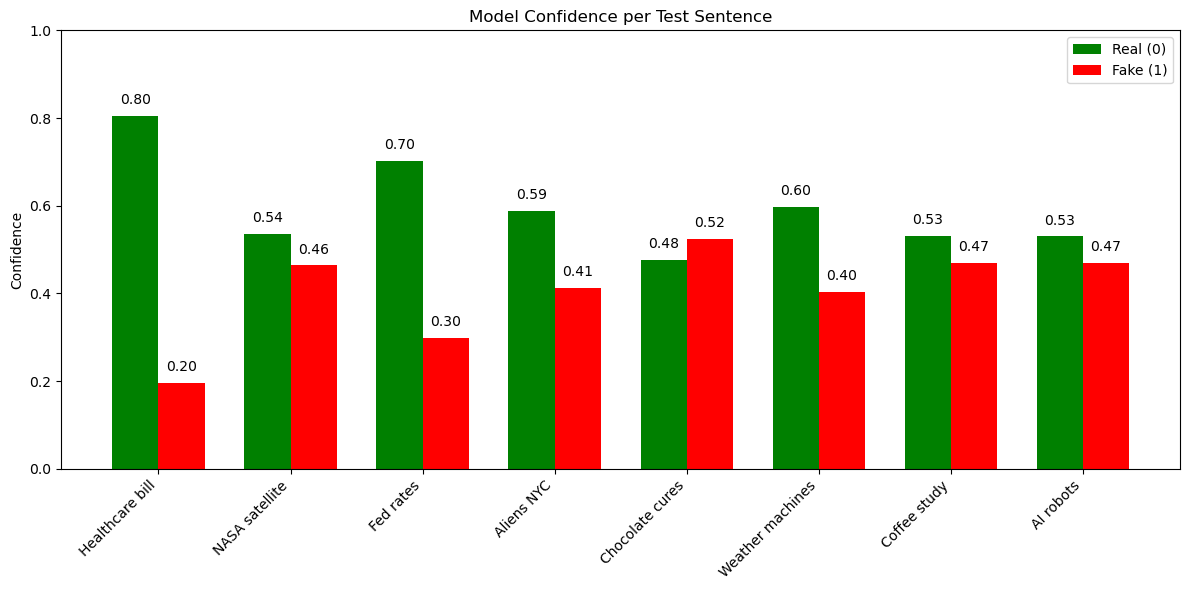

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Short labels for display (to fit on x-axis)
labels = [
    "Healthcare bill",
    "NASA satellite",
    "Fed rates",
    "Aliens NYC",
    "Chocolate cures",
    "Weather machines",
    "Coffee study",
    "AI robots"
]

# Extract confidence values from your results dataframe
real_probs = results_df["Confidence Real (0)"].values
fake_probs = results_df["Confidence Fake (1)"].values

x = np.arange(len(labels))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))

# Plot bars
rects1 = ax.bar(x - width/2, real_probs, width, label='Real (0)', color='green')
rects2 = ax.bar(x + width/2, fake_probs, width, label='Fake (1)', color='red')

# Labels and title
ax.set_ylabel('Confidence')
ax.set_title('Model Confidence per Test Sentence')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylim(0, 1)  # probabilities between 0 and 1
ax.legend()

# Optional: show exact values on top of bars
for i in range(len(labels)):
    ax.text(x[i]-width/2, real_probs[i]+0.02, f"{real_probs[i]:.2f}", ha='center', va='bottom')
    ax.text(x[i]+width/2, fake_probs[i]+0.02, f"{fake_probs[i]:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()
